# Machine Learning 

In [1]:
#load the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


Bad key "text.kerning_factor" on line 4 in
/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#load the datatset
df3 = pd.read_csv("./Machine_learning")
df3.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_new,number_of_reviews_new,reviews_per_month_new,calculated_host_listings_count_new,availability_365_new
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0,9.0,0.21,5.0,365.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0,45.0,0.38,2.0,355.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,150.0,0.0,0.00,1.0,365.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0,70.0,3.00,1.0,194.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,80.0,9.0,0.10,1.0,0.0


In [3]:
df3=df3.drop(["last_review","neighbourhood","price","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365","latitude","longitude"],axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   neighbourhood_group                 48895 non-null  object 
 1   room_type                           48895 non-null  object 
 2   minimum_nights                      48895 non-null  int64  
 3   price_new                           48895 non-null  float64
 4   number_of_reviews_new               48895 non-null  float64
 5   reviews_per_month_new               48895 non-null  float64
 6   calculated_host_listings_count_new  48895 non-null  float64
 7   availability_365_new                48895 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.0+ MB


In [4]:
#We will appy machine learning using three different technique.
#Univariate Selection 
#Feature Importance
#Correlation Matrix with Heatmap

In [5]:
#Feature Enginnering : convert the categorical datatset into numeric column. We can do in 3 differents ways..
#1.LabelEncoder or OneHotEncoder
#2.DictVectorizer
#3.Pandas .get_dummies()

# LabelEncoder & OneHotEncoder
## LabelEncoder : Binary class and OneHotEncoder : Multi Class.

In [6]:
#Categorical features 
X = df3.drop(["price_new"],axis=1)

In [7]:
#Categorical boolean mask 
categorical_feature_mask = X.dtypes==object

In [8]:
#filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [9]:
categorical_cols

['neighbourhood_group', 'room_type']

In [10]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#instantiate labelencoder object
le = LabelEncoder()

In [11]:
# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

In [12]:
#Counts of each neighbourhood_group
df3['neighbourhood_group'].value_counts().sort_index()

Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [13]:
#Counts of each neighbourhood_group as per LebalEncoder
X[categorical_cols]["neighbourhood_group"].value_counts().sort_index()

0     1091
1    20104
2    21661
3     5666
4      373
Name: neighbourhood_group, dtype: int64

In [14]:
#Counts of each room_type
df3['room_type'].value_counts().sort_index()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [15]:
#Counts of each room_type as per LebalEncoder
X[categorical_cols]["room_type"].value_counts().sort_index()

0    25409
1    22326
2     1160
Name: room_type, dtype: int64

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   neighbourhood_group                 48895 non-null  int64  
 1   room_type                           48895 non-null  int64  
 2   minimum_nights                      48895 non-null  int64  
 3   number_of_reviews_new               48895 non-null  float64
 4   reviews_per_month_new               48895 non-null  float64
 5   calculated_host_listings_count_new  48895 non-null  float64
 6   availability_365_new                48895 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 2.6 MB


In [17]:
#set the X features independent variable 
X = X[["neighbourhood_group","room_type","minimum_nights","number_of_reviews_new","reviews_per_month_new","calculated_host_listings_count_new",
      "availability_365_new"]]

In [18]:
#set the target dependent variable.
y = df3["price_new"]

In [19]:
#load the library 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply the SelectKBest class to extract top features.
bestfeatures = SelectKBest(score_func=chi2 , k="all")

In [20]:
#fit the model 
fit = bestfeatures.fit(X,y)

In [21]:
#Find the scores 
Xscores = pd.DataFrame(fit.scores_)
Xcolumns = pd.DataFrame(X.columns)

In [22]:
#concat the dataframe for better visualization
featureScores = pd.concat([Xcolumns,Xscores],axis=1)
featureScores.columns = ["features","scores"]

In [23]:
#top n_largest 5 features 
featureScores.nlargest(5,"scores").sort_index()

,features,scores
1,room_type,13779.910860
2,minimum_nights,31597.408186
3,number_of_reviews_new,46298.458539
5,calculated_host_listings_count_new,3513.687948
6,availability_365_new,284778.840432


## Feature_importances of tree based classifiers

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03018549 0.02375008 0.19026814 0.17753712 0.26050875 0.02520175
 0.29254866]


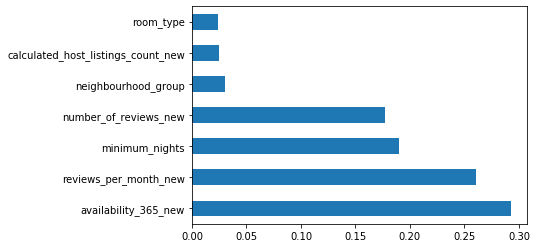

In [25]:
model = ExtraTreesClassifier()
model.fit(X,y)
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Heat Map

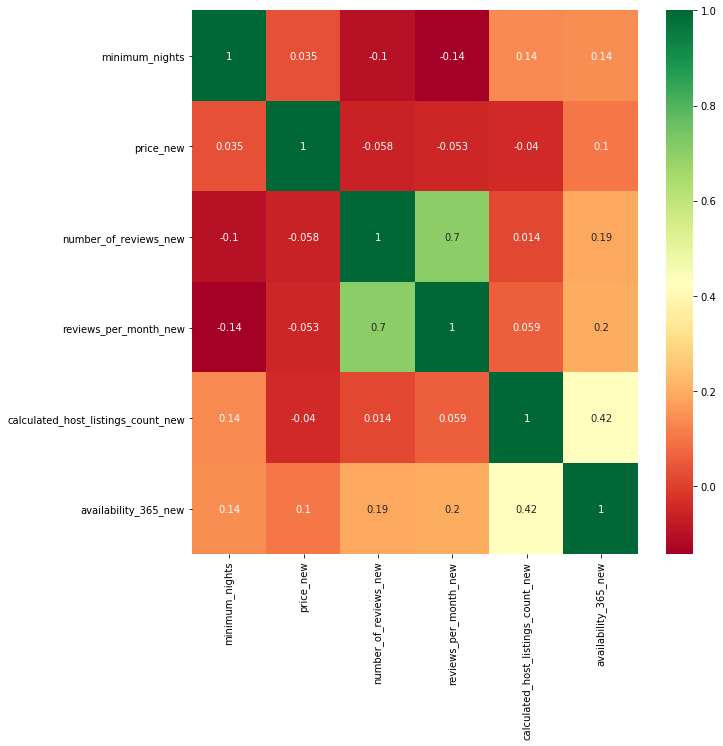

In [26]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Evaluated the Machine Learning model using the RMSE (Root Mean Squared Error) metric.

# Linear Regression

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#Apply the train and test.
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
#Apply Linear Regression.
reg=LinearRegression()
#Fit the model
reg.fit(X_train,y_train)
#Predit the model
y_pred= reg.predict(X_test)

#Model Evaluation using Root^2
print("R^2: ", reg.score(X_test,y_test))

#Model Evaluation using Root Mean Square Error
print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R^2:  0.40577976071865374
Root Mean Square Error:  56.100258603243766


# Cross Validation

In [28]:
#Cross Validation : This method avoids the problem of your metric of choice dependent on training test split.
from sklearn.model_selection import cross_val_score
#set the cross_validation (cv_score) for linear regression
cv_score_reg = cross_val_score(reg,X,y,cv=5)
print("CV_score_reg:",cv_score_reg)
print("Average cv_score_reg:",format(np.mean(cv_score_reg)))

CV_score_reg: [0.33469304 0.39388782 0.36624381 0.41394361 0.42029905]
Average cv_score_reg: 0.3858134685714503


# Regularized regression 
## Ridge Regression

In [29]:
# Regularized regression : Ridge Regression
from sklearn.linear_model import Ridge
#choose the alpha parameter 
ridge = Ridge(alpha=0.1,normalize =True)
#fit the model
ridge.fit(X_train,y_train)
#predict the model
ridge_pred=ridge.predict(X_test)

#Model Evaluation using Root^2
print("R^2:",ridge.score(X_test,y_test))
#Model Evaluation using Root Mean Square Error
print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test,ridge_pred)))

R^2: 0.40115958879521707
Root Mean Square Error:  56.31793123852116


## Lasso Regression

In [30]:
# Regularized regression : Lasso Regression
from sklearn.linear_model import Lasso
#choose the alpha parameter 
lasso = Lasso(alpha=0.1,normalize =True)
#fit the model
lasso.fit(X_train,y_train)
#predict the model
lasso_pred=ridge.predict(X_test)

#Model Evaluation using Root^2
print("R^2:",lasso.score(X_test,y_test))
#Model Evaluation using Root Mean Square Error
print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)))

R^2: 0.30146233013916124
Root Mean Square Error:  56.31793123852116


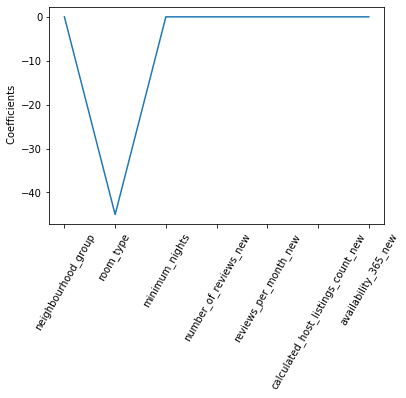

In [31]:
# Regularized regression : Lasso Regression
from sklearn.linear_model import Lasso
features = X.columns
#choose the alpha parameter 
lasso = Lasso(alpha=0.1,normalize =True)
lasso_coef = lasso.fit(X_train,y_train).coef_
_ = plt.plot(range(len(features)),lasso_coef)
_ = plt.xticks(range(len(features)),features,rotation=60)
_ = plt.ylabel(" Coefficients")
_ = plt.show()

We can see room_type not being considered the most important features becasuse prices of each different room type will change over the peroid of the time. Hence all the other features are excatly zero. 

# Hold-out Set : Regression

Perform the GridSearchCV  and ElasticNet for tuning the hyperparamter and evaluate the Root Mean Squeared Error(RMSE)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
#Setup the hyperparameter grid
normalizes= ([True,False])
alphas = np.array([1,0.1,0.01,0])
# Create the hyperparameter grid
param_grid = {'alpha': alphas , 'normalize' :normalizes}
#instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()
#Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
# Fit it to the training data
gm_cv.fit(X_train, y_train)
# Predict on the test set and compute metrics
gm_cv_pred = gm_cv.predict(X_test)
#Model Evaluation using Root^2
print("R^2:",gm_cv.score(X_test,y_test))
#Model Evaluation using Root Mean Square Error
print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test,gm_cv_pred)))

/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49861926.94938804, tolerance: 16557.627278470492
  positive)
/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegr

R^2: 0.4057797607186535
Root Mean Square Error:  56.10025860324377


/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62256815.73778668, tolerance: 20693.616535627312
  positive)


# Random Forest

In [33]:
#Load the Random Forest from sklearn!
from sklearn.ensemble import RandomForestRegressor
#initiate the model.
rf=RandomForestRegressor()
#fit the model
rf.fit(X_train,y_train)
#Predict the model
rf_pred= rf.predict(X_test)

#Model Evaluation using Root^2
print("R^2: ", rf.score(X_test,y_test))

#Model Evaluation using Root Mean Square Error
print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2:  0.45278295238688343
Root Mean Square Error:  53.83577291761232


In [34]:
#Set the cross_validation (cv_score) for Random forest regression
cv_score_rf = cross_val_score(rf,X,y,cv=5)
print("CV_score_rf:",cv_score_rf)
print("Average cv_score_rf:",format(np.mean(cv_score_rf)))

CV_score_rf: [0.33886153 0.39768975 0.39920472 0.46878439 0.44692041]
Average cv_score_rf: 0.4102921607886286


As per above machine leaning model Random Forest Regressor provide best result with lowest RMSE score. 